In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

In [2]:
def full_pivoting(A: np.array, B: np.array, row_id: int, curr_col_order: list):
    max_row_id, max_col_id = row_id, row_id
    for r in range(row_id, A.shape[0]):
        for c in range(row_id, A.shape[1]):
            if abs(A[r, c]) > abs(A[max_row_id, max_col_id]):
                max_row_id, max_col_id = r, c

    if max_row_id != row_id:
        #lets, change rows
        copyA, copyB = np.copy(A[row_id]), np.copy(B[row_id])
        A[row_id], B[row_id] = A[max_row_id], B[max_row_id]
        A[max_row_id], B[max_row_id] = copyA, copyB

    if max_col_id != row_id:
        #lets change cols
        copy_col_with_max = np.copy(A[:, max_col_id])
        A[:, max_col_id] = A[:, row_id]
        A[:, row_id] = copy_col_with_max

    curr_col_order[row_id], curr_col_order[max_col_id] = curr_col_order[max_col_id], curr_col_order[row_id]

def gauss_jordan_full_pivoting(A: np.array, B: np.array):
    n = A.shape[0]
    if n < A.shape[1]:
        print("Too many unknows")
        return None

    A_copy, B_copy = np.copy(A), np.copy(B)
    curr_col_order = [i for i in range(A_copy.shape[1])]
    for i in range(n):
        full_pivoting(A_copy, B_copy, i, curr_col_order) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]

        for j in range(i+1, n):
            #lets go w dół
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = B_copy[j] - B_copy[i] * m

        for z in range(0, i):
            #lets go w górę
            m = A_copy[z,i]/pivot
            A_copy[z] = np.subtract(A_copy[z], A_copy[i]*m)
            B_copy[z] = B_copy[z] - B_copy[i] * m

    for i in range(n):
        B_copy[i] = B_copy[i]/A_copy[i,i]

    #Now we have results in B but without a proper order
    result = np.copy(B_copy)
    for i in range(A_copy.shape[1]):
        if curr_col_order[i] == i:
            continue

        curr_pos = curr_col_order[i]
        result[curr_pos] = B_copy[i]

    return result

In [3]:
def partial_piwoting(A: np.array, B: np.array, row_id: int):
    max_row_id = row_id
    for i in range(row_id+1, A.shape[0]):
        if abs(A[i, row_id]) > abs(A[max_row_id, row_id]):
            max_row_id = i

    copyA, copyB = np.copy(A[row_id]), np.copy(B[row_id])
    A[row_id], B[row_id] = A[max_row_id], B[max_row_id]
    A[max_row_id], B[max_row_id] = copyA, copyB

    return A,B

def gauss_jordan(A: np.array, B: np.array):
    n = A.shape[0]
    A_copy, B_copy = np.copy(A), np.copy(B)

    if n < A_copy.shape[1]:
        print("Too many unknows")
        return None

    for i in range(A.shape[1]):
        partial_piwoting(A_copy, B_copy, i) #Reshape A i B to get the piwot at the top
        pivot = A_copy[i,i]

        for j in range(i+1, n):
            #lets go w dół
            m = A_copy[j,i]/pivot
            A_copy[j] = np.subtract(A_copy[j], A_copy[i]*m)
            B_copy[j] = B_copy[j] - B_copy[i] * m

        for z in range(0, i):
            #lets go w górę
            m = A_copy[z,i]/pivot
            A_copy[z] = np.subtract(A_copy[z], A_copy[i]*m)
            B_copy[z] = B_copy[z] - B_copy[i] * m

    for i in range(n):
        B_copy[i] = B_copy[i]/A_copy[i,i]

    return B_copy

In [4]:
def test_gauss_jordan(size: int, with_full=True):
    random.seed(10)
    matrix = np.random.random((size, size))
    results = np.random.random((size, 1))
    time_res = dict()

    start = time.time()
    part = gauss_jordan(matrix, results)
    time_res["part"] = time.time() - start

    if with_full:
        start = time.time()
        full = gauss_jordan_full_pivoting(matrix, results)
        time_res["full"] = time.time() - start

    start = time.time()
    res = np.linalg.solve(matrix, results)
    time_res["numpy"] = time.time() - start

    print(f"MATRIX SIZE: {size}")
    if with_full:
        print(f"TIMES: partial_pivot: {time_res['part']}, full_pivot: {time_res['full']}, numpy_linalg_solve: {time_res['numpy']}")
        np.testing.assert_allclose(res, full)
        print(f"Full pivoting works fine with size")
    else:
        print(f"TIMES: partial_pivot: {time_res['part']}, numpy_linalg_solve: {time_res['numpy']}")

    np.testing.assert_allclose(part, res)
    print(f"Partial pivoting works fine with size\n")

    return time_res

Sprawdzenie poprawności zarówno dla `partial_pivoting` jak i `full_pivoting`:

In [8]:
small_results = dict()
for i in range(11):
    tested_size = 50 + 25*i
    small_results[tested_size] = test_gauss_jordan(tested_size)

MATRIX SIZE: 50
TIMES: partial_pivot: 0.021943092346191406, full_pivot: 0.05485057830810547, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 75
TIMES: partial_pivot: 0.03989386558532715, full_pivot: 0.12967920303344727, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 100
TIMES: partial_pivot: 0.06878876686096191, full_pivot: 0.37404441833496094, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 125
TIMES: partial_pivot: 0.26927947998046875, full_pivot: 0.9952714443206787, numpy_linalg_solve: 0.0
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 150
TIMES: partial_pivot: 0.2754497528076172, full_pivot: 1.190687894821167, numpy_linalg_solve: 0.007979154586791992
Full pivoting works fine with size
Partial pivoting works fine with size

MATRIX SIZE: 175
TIMES: partial_p

Widząc jak bardzo zmienia się czas wykonywania algorytmu z użyciem `full_pivoting`, zdecydowałem się przerwać jego iterację na wyżej wypisanych przykładach i następne obliczenia (dla o wiele większych macierzy) wykonać tylko dal `partial_pivoting` oraz algorytmu wbudowanego w numpy.

In [9]:
large_result = dict()

for i in range(14):
    tested_size = 350 + 50*i
    large_result[tested_size] = test_gauss_jordan(tested_size, with_full=False)

MATRIX SIZE: 350
TIMES: partial_pivot: 1.364159345626831, numpy_linalg_solve: 0.0
Partial pivoting works fine with size

MATRIX SIZE: 400
TIMES: partial_pivot: 2.1352336406707764, numpy_linalg_solve: 0.0
Partial pivoting works fine with size

MATRIX SIZE: 450
TIMES: partial_pivot: 3.007815361022949, numpy_linalg_solve: 0.0032296180725097656
Partial pivoting works fine with size

MATRIX SIZE: 500
TIMES: partial_pivot: 3.6600289344787598, numpy_linalg_solve: 0.0009970664978027344
Partial pivoting works fine with size

MATRIX SIZE: 550
TIMES: partial_pivot: 4.178042888641357, numpy_linalg_solve: 0.0032722949981689453
Partial pivoting works fine with size

MATRIX SIZE: 600
TIMES: partial_pivot: 5.257572889328003, numpy_linalg_solve: 0.005501985549926758
Partial pivoting works fine with size

MATRIX SIZE: 650
TIMES: partial_pivot: 5.8601930141448975, numpy_linalg_solve: 0.056467533111572266
Partial pivoting works fine with size

MATRIX SIZE: 700
TIMES: partial_pivot: 7.360568523406982, nump

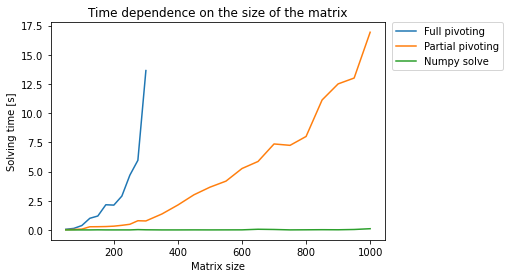

In [10]:
def create_time_plot(times_with_full_piv, times_without_full_piv):
    N = list(times_with_full_piv.keys())
    full_piv = [times_with_full_piv[n]['full'] for n in N]
    plt.plot(N, full_piv)

    N.extend(list(times_without_full_piv.keys()))
    part_piv = [times_with_full_piv[n]['part'] if n in times_with_full_piv else times_without_full_piv[n]['part'] for n in N]
    numpy = [times_with_full_piv[n]['numpy'] if n in times_with_full_piv else times_without_full_piv[n]['numpy']  for n in N]

    plt.plot(N, part_piv)
    plt.plot(N, numpy)
    plt.legend(['Full pivoting', 'Partial pivoting', 'Numpy solve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Matrix size')
    plt.ylabel('Solving time [s]')
    plt.title(f"Time dependence on the size of the matrix")
    plt.show()

create_time_plot(small_results, large_result)